## Данный ноутбук обрабатывает текст сообщений: удаляет стоп слова, проводит лемматизацию и стемминг

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.corpus import brown
import re
from tqdm import tqdm_notebook as tqdm
from nltk.stem import SnowballStemmer

In [2]:
#удалить перепосты
# в режексе заменять на пробел
# удалить слова с леном 1
df = pd.read_csv('/is/texts/tg/text_lower_ticker_flag_dt.csv', sep='|')
df.head()

,date,message,src,lower_text,ticker,day,month,year,day_of_week,dt
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00


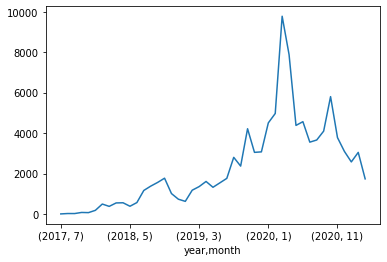

In [6]:
df.groupby(['year', 'month']).count().message.plot()

In [7]:
df.groupby(['src', 'year']).count().message

src  year
25   2017      277
     2018     2011
     2019     4015
     2020     3972
     2021      339
26   2020    14499
     2021      673
27   2017       91
     2018     8510
     2019    17432
     2020    26071
     2021     1919
28   2020     3060
     2021     4163
48   2019     3438
     2020    12456
     2021      262
Name: message, dtype: int64

### Очистка

In [8]:
# Удаляем перенос строки
df = df.replace('\n',' ', regex=True)
df.head()

,date,message,src,lower_text,ticker,day,month,year,day_of_week,dt
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00


In [9]:
f = df.copy()
f.rename(columns = {'lower_text':'text'}, inplace=True)
f.head()

,date,message,src,text,ticker,day,month,year,day_of_week,dt
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00


### Замена ё/е и удаление всего кроме русских букв и пробелов

In [11]:
f.text = f.text.astype(str)
f['text'] = f['text'].str.replace('ё', 'е')
f.to_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e.csv', sep='|', index=False)
f.head()
    

,date,message,src,text,ticker,day,month,year,day_of_week,dt
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00


In [12]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [13]:
def clear_text(x):
    return re.sub(' +',u' ', re.sub(u'[^а-я ]',u'', x.lower()))
f['text'] = f['text'].astype(str)
f['text_reg'] = f['text'].apply(clear_text)
f.head()

,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00,инвестиционные идеи от финам ростелеком покуп...


In [14]:
print(f.shape)
f = f[f.text_reg != '']
f.to_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg.csv', sep='|', index=False)
print(f.shape)
f.head()

(103188, 11)
(102236, 11)


,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00,инвестиционные идеи от финам ростелеком покуп...


### Исправление орфографических ошибок

In [15]:
from pyaspeller import YandexSpeller
speller = YandexSpeller()
speller.spelled('сбербонк')

'сбербанк'

In [21]:
f = pd.read_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg.csv', sep='|')
f.head()

,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00,инвестиционные идеи от финам ростелеком покуп...


In [22]:
print(f.shape)
f.drop_duplicates(['ticker', 'text_reg'], inplace=True)
print(f.shape)
f.drop_duplicates(['text_reg'], keep=False, inplace=True)
print(f.shape)

(102236, 11)
(100287, 11)
(100205, 11)


In [23]:
f.head()

,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00,инвестиционные идеи от финам ростелеком покуп...


In [24]:
f.text_reg = f.text_reg.astype(str)
f['text_reg_spell'] = None
for i in tqdm(range(f.shape[0]), position=0, leave=True):
    f['text_reg_spell'].iloc[i] = speller.spelled(f['text_reg'].iloc[i])
f.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg,text_reg_spell
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла,белуга опять вверх пошла
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема,тоже интересная тема
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...,новые возможности единого счета от финама пом...
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью,что произошло с моей башнефтью
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00,инвестиционные идеи от финам ростелеком покуп...,инвестиционные идеи от финам ростелеком покуп...


In [25]:
print(f.shape)
f.drop_duplicates(['ticker', 'text_reg_spell'], inplace=True)
print(f.shape)
f.drop_duplicates(['text_reg_spell'], keep=False, inplace=True)
print(f.shape)
f.to_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg_spell.csv', sep='|', index=False)

(100205, 12)
(100115, 12)
(100115, 12)


### Токенизация text_reg_spell

In [26]:
tokens = []
l = f['text_reg_spell'].tolist()
print(len(l))
for i in tqdm(range(len(l)), position=0, leave=True):
    tokens.append(nltk.word_tokenize(l[i]))
print(len(tokens))

with open('/is/pkl/tg_tokens_spell.pkl', 'wb') as tn:
    pickle.dump(tokens, tn)

100115


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



100115


### Добавляем стоп слова

In [8]:
f = pd.read_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg_spell.csv', sep='|')
f.head()

,date,message,src,text,rosn,gmkn,moex,alrs,lkoh,sngs,...,zvez,gazp,sber,flag,day,month,year,dt,text_reg,text_reg_spell
0,20210309.0,Плюс классика жанра. После отметки 2000 избушк...,25,плюс классика жанра. после отметки 2000 избушк...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9,3,2021,2021-03-09 01:00:21+00:00,плюс классика жанра после отметки избушки друж...,плюс классика жанра после отметки избушки друж...
1,20210308.0,У меня один знакомый трейдер – медведь по золо...,25,у меня один знакомый трейдер – медведь по золо...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8,3,2021,2021-03-08 19:29:11+00:00,у меня один знакомый трейдер медведь по золоту...,у меня один знакомый трейдер медведь по золоту...
2,20210308.0,"#GDH2021 чуть чуть не доехали, и тут корректир...",25,"#gdh2021 чуть чуть не доехали, и тут корректир...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8,3,2021,2021-03-08 18:16:38+00:00,чуть чуть не доехали и тут корректировка врем...,чуть чуть не доехали и тут корректировка врем...
3,20210308.0,"#GDH2021 чуть чуть не доехали, и тут корректир...",25,"#gdh2021 чуть чуть не доехали, и тут корректир...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8,3,2021,2021-03-08 18:15:33+00:00,чуть чуть не доехали и тут корректировка врем...,чуть чуть не доехали и тут корректировка врем...
4,20210308.0,Тут как бы 2 вартанта,25,тут как бы 2 вартанта,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8,3,2021,2021-03-08 18:08:53+00:00,тут как бы вартанта,тут как бы варианта


In [27]:
stop_words = nltk.corpus.stopwords.words('russian')

In [28]:
ls = []
for i in stop_words:
    if 'да' not in i and 'не' not in i:
        ls.append(i.replace('ё', 'е'))
len(set(ls))

134

In [29]:
#https://www.bukvarix.com/bukvarix-stop-words.html
y = ['как', 'так', 'когда', 'где', 'куда', 'почему', 'зачем', 'сколько', 'откуда', 'только', 'еще', 'ещё', 'уже', 'да', 'нет', 'не', 'я', 'меня', 'мне', 'мной', 'мною', 'мой', 'мое', 'моё', 'моего', 'моему', 'моем', 'моя', 'мою', 'моей', 'моею', 'мои', 'моих', 'моим', 'моими', 'ты', 'тебя', 'тебе', 'тобой', 'тобою', 'он', 'оно', 'его', 'него', 'ему', 'нему', 'им', 'ним', 'нем', 'она', 'ее', 'её', 'нее', 'ей', 'ней', 'ею', 'нею', 'вы', 'вас', 'вам', 'вами', 'мы', 'нас', 'нам', 'нами', 'наш', 'наше', 'нашего', 'нашему', 'нашим', 'нашем', 'наша', 'нашу', 'нашей', 'нашею', 'наши', 'наших', 'нашим', 'нашими', 'они', 'их', 'них', 'им', 'ими', 'ними', 'кто', 'кого', 'кому', 'кем', 'ком', 'что', 'чего', 'чему', 'чем', 'этот', 'это', 'этого', 'этому', 'этим', 'этом', 'эта', 'эту', 'этой', 'этою', 'эти', 'этих', 'этим', 'этими', 'тот', 'то', 'того', 'тому', 'том', 'та', 'ту', 'той', 'те', 'тех', 'тем', 'теми', 'такой', 'такое', 'такого', 'такому', 'таком', 'такая', 'такую', 'такой', 'такою', 'такие', 'таких', 'таким', 'такими', 'свой', 'свое', 'своего', 'своему', 'своим', 'своем', 'своя', 'свою', 'своей', 'своею', 'свои', 'своих', 'своим', 'своими', 'который', 'которое', 'которого', 'которому', 'которым', 'котором', 'которая', 'которую', 'которой', 'которою', 'которые', 'которых', 'которым', 'которыми', 'сам', 'само', 'самого', 'самому', 'самим', 'самом', 'сама', 'саму', 'самой', 'сами', 'самих', 'самим', 'самими', 'себя', 'себе', 'собой', 'собою', 'один', 'одно', 'одного', 'одному', 'одним', 'одном', 'одна', 'одну', 'одной', 'одною', 'одни', 'одних', 'одним', 'одними', 'весь', 'всё', 'всего', 'всему', 'всем', 'вся', 'всю', 'всей', 'всею', 'все', 'всех', 'всем', 'всеми', 'твой', 'твоё', 'твое', 'твоего', 'твоему', 'твоим', 'твоем', 'твоём', 'твоя', 'твою', 'твоей', 'твоею', 'твои', 'твоих', 'твоим', 'твоими', 'ваш', 'ваше', 'вашего', 'вашему', 'вашим', 'вашем', 'ваша', 'вашу', 'вашей', 'вашей', 'вашею', 'ваши', 'ваших', 'вашим', 'вашими', 'какой', 'какое', 'какого', 'какому', 'каким', 'каком', 'какая', 'какую', 'какой', 'какие', 'каких', 'каким', 'какими', 'чей', 'чье', 'чьё', 'чьего', 'чьему', 'чьим', 'чьем', 'чья', 'чьей', 'чьею', 'чьи', 'чьих', 'чьим', 'чьими']


In [30]:
x = ['как', 'так', 'когда', 'только', 'еще', 'ещë', 'уже', 'я', 'меня', 'мне', 'мной', 'мною', 'мы', 'нас', 'нам', 'нами', 'ты', 'тебя', 'тебе', 'тобой', 'тобою', 'вы', 'вас', 'вам', 'вами', 'он', 'оно', 'его', 'него', 'ему', 'нему', 'им', 'ним', 'нем', 'нём', 'она', 'ее', 'еë', 'нее', 'неё', 'ей', 'ней', 'ею', 'нею', 'они', 'их', 'них', 'ими', 'ними', 'мой', 'мое', 'моë', 'моего', 'моему', 'моем', 'моëм', 'моя', 'мою', 'моей', 'моею', 'мои', 'моих', 'моим', 'моими', 'наш', 'наше', 'нашего', 'нашему', 'нашим', 'нашем', 'наша', 'нашу', 'нашей', 'нашею', 'наши', 'наших', 'нашими', 'кто', 'кого', 'кому', 'кем', 'ком', 'что', 'чего', 'чему', 'чем', 'этот', 'это', 'этого', 'этому', 'этим', 'этом', 'эта', 'эту', 'этой', 'этою', 'эти', 'этих', 'этими', 'тот', 'то', 'того', 'тому', 'том', 'та', 'ту', 'той', 'тою', 'те', 'тех', 'тем', 'теми', 'такой', 'такое', 'такого', 'такому', 'таком', 'такая', 'такую', 'такою', 'такие', 'таких', 'таким', 'такими', 'свой', 'свое', 'своё', 'своего', 'своему', 'своим', 'своем', 'своём', 'своя', 'свою', 'своей', 'своею', 'свои', 'своих', 'своими', 'который', 'которое', 'которого', 'которому', 'которым', 'котором', 'которая', 'которую', 'которой', 'которою', 'которые', 'которых', 'которыми', 'сам', 'себя', 'себе', 'собой', 'собою', 'один', 'одно', 'одного', 'одному', 'одним', 'одном', 'одна', 'одну', 'одной', 'одною', 'одни', 'одних', 'одними', 'весь', 'всë', 'всего', 'всему', 'всем', 'вся', 'всю', 'всей', 'всею', 'все', 'всех', 'всеми', 'кто-то', 'что-то', 'быть', 'был', 'была', 'было', 'были', 'буду', 'будем', 'будешь', 'будет', 'будут', 'будь', 'будьте', 'есть', 'мочь', 'могу', 'можем', 'можешь', 'можете', 'может', 'могут', 'мог', 'могла', 'могло', 'могли']

In [31]:
for i in y:
    if 'да' not in i and 'не' not in i:
        ls.append(i.replace('ё', 'е'))
len(set(ls))

306

In [32]:
for i in x:
    if 'да' not in i and 'не' not in i:
        ls.append(i.replace('ё', 'е'))
len(set(ls))

331

In [33]:
# добавить тикеры и их аналоги в стоп слова
tickers = {
'gazp' : ['gazp', 'газпром',   'миллер', 'газик', 'нашевсе', 'северный поток', 'южный поток', 'сила сибири', \
          'ru0007661625'],
    
'sber' : ['sber', 'сбер', 'греф', 'ru0009029540', 'сберушко', 'грефа', 'грефу'],
'vtbr' : ['vtb', 'костин', 'втб', 'внешторгбанк', 'народное ipo', 'ru000A0JP5V6'],
'rosn':  ['rosn', 'роснефт', 'сечин', 'ru000a0j2q06', 'роснефть'],
'gmkn':  ['gmkn', 'норникел', 'nornickel', 'потанин', 'гмк', 'норк', 'интеррос', 'гамак', 'ru0007288411', 'норникель'],
'moex':  ['московская биржа', 'мосбирж', 'moex', 'москухн', 'ru000a0jr4a1'],
'alrs':  ['алрос', 'alrosa', 'alrs', 'алмаз', 'бриллиант', 'нюрб', 'ru0007252813'],
'lkoh':  ['lkoh', 'luk', 'алекперов', 'лукойл', 'лучок', 'лучк', 'ru0009024277'],
'sngs':  ['сургут', 'sngs', 'surgutneftega', 'кубышка', 'сурик', 'снгс', 'ru0008926258'],
'tatn':  ['татнефт', 'tatneft', 'tatn', 'маганов', 'ru0009033591', 'татнефть'],
'yndx':  ['yndx', 'yandex', 'яндекс', 'волож'],
'aflt':  ['аэрофлот', 'aflt', 'добролет', 'аврор', 'российские авиалинии', 'полубояринов'],
'fees':  ['фск еэс', 'fees', 'феес', 'федеральные электросети', 'феск'],
'magn':  ['ммк', 'magn', 'магнитк', 'магнитогорск', 'магна'],
'mtss':  ['mts', 'мтс'],
'nvtk':  ['nvtk', 'новатэк', 'нова тэк', 'novatek', 'ямал спг', 'михельсон'],
'nlmk':  ['нлмк', 'nlmk', 'липецк', 'лисин', 'липк'],
'chmf':  ['северстал', 'chmf', 'severstal', 'севка', 'череповец', 'мордашов'],
'mgnt':  ['mgnt', 'магнит', 'magnit', 'марафон групп', 'галицкий', 'тандер'],
'plzl':  ['plzl', 'polyus', 'полюс', 'polyusgold', 'сухой лог'],
'qiwi':  ['qiwi', 'киви'],
'rasp':  ['rasp', 'распад'],
'lsrg':  ['лср', 'lsr', 'элэсэр'],
'mtlr':  ['мечел', 'mtlr', 'mechel', 'ru000a0jpv70', 'мечело'],
'phor':  ['фосагр', 'phor', 'phosagr', 'фосфат', 'dap'],
'rtkm':  ['rtkm', 'rostelecom', 'ростел', 'tele2', 'ртк', 'рткм', 'осеевский'],
'hydr':  ['русгидр', 'hydr', 'rushydr', 'гидра', 'ru000a0jpkh7', 'русгидра', 'русгидро'],
'afks':  ['афк', 'afks', 'afk sistem', 'ozon', 'евтушенков', 'система'],
'trmk':  ['тмк', 'трубная', 'trmk', 'tmk', 'трмк'],
'upro':  ['юнипро', 'upro', 'unip', 'эон россия', 'березовская грэс'],
'akrn':  ['акрон', 'akrn', 'akron', 'азотные удобрения'],
'pikk':  ['пик', 'pik', 'мортон'],
'lnta':  ['лент', 'lent', 'lnta', 'tpg capital'],
'msng':  ['мосэнерг', 'msng', 'mosenerg', 'мося'],
'tgka':  ['тгк1', 'тгк-1', 'тгк 1', 'tgka', 'tgk-1', 'tgk1', 'tgk 1'],
'rual':  ['русал', 'rusal', 'rual', 'русский алюминий', 'краз', 'дерипаск', 'дерипаска'],
'trnf':  ['транснефт', 'trnf', 'нефтепровод дружба'],
'sibn':  ['газпромнефт', 'sibn', 'gazpromneft', 'sibneft', 'сибнефт', 'газнефт'],
'nmtp':  ['нмтп', 'nmtp', 'новороссийск', 'новопорт'],
'tanl':  ['tanl', 'tantal', 'тант'],
'iskj':  ['искч', 'институт стволовых клеток', 'стволовые клетки', 'стволовых клеток', 'iskj'],
'yakg':  ['ятэк', 'yakg', 'yakutsk fue', 'якутская топл', 'ru0007796819'],
'gtlc':  ['gtl', 'джитиэл', 'гтл'],
'gche':  ['черкизов', 'cherkizov', 'che'],
'rolo':  ['русолов', 'rolo', 'rusolov', 'ролово'],
'svav':  ['соллерс', 'svav', 'sollers', 'северстальавт', 'уаз'],
'arsa':  ['арсагер', 'ук арса', 'arsa', 'arsager'],
'krkn':  ['саратовский нпз', 'снпз', 'krkn', 'сарнпз'],
'selg':  ['селигдар', 'seligdar', 'selg'],
'prfn':  ['чзпсн', 'профнастил', 'настил', 'prfn'],
'gaza':  ['gaza', 'газ завод', 'газ авто', 'газель', 'горьковский'],
'kbtk':  ['kbtk', 'кбтк', 'кузбас', 'даэния холдинг'],
'nknc':  ['nknc', 'нижнекамск', 'нкнх', 'нефтехим'],
'aptk':  ['aptk', 'аптек', '36 и 6', '36.6'],
'amez':  ['amez', 'ашинский', 'аша', 'amet', 'амез', 'амет'],
'dasb':  ['dasb', 'даг'],
'irkt':  ['иркут', 'irkt', 'сухой', 'суперджет', 'sukhoi', 'ssj'],
'lsng':  ['ленэнерг', 'lsng', 'ленк', 'петербургские электросети', 'ленэнерго'],
'rlmn':  ['ролл', 'ролман', 'rlmn', 'роля'],
'obuv':  ['обувь росси', 'obuv', 'westfalika', 'обувьрус'],
'abrd':  ['абрау', 'дюрсо', 'abrd', 'abrau', 'durso', 'русский винный дом', 'борис титов', 'ru000a0js5t7'],
'agro':  ['agro', 'русагро', 'us7496552057'],
'albk':  ['бест эффортс', 'albk', 'best efforts', 'алор банкбестэфб', 'ru000a0js2m9'],
'alnu':  ['alnu', 'nyurba', 'алроса-нюрба', 'якуталмаз', 'ru000a0jp468'],
'aqua':  ['аквакультураaqua', 'aquacultur', 'русаква', 'русское море', 'ru000a0jqts3'],
'assb':  ['астрэнсб', 'assb', 'astrakhan', 'аэск', 'астраханэнергосбыт', 'ru000a0d8mm8'],
'avan':  ['avangard', 'авангард', 'ru000a0dm7b3'],
'bane':  ['башнефт', 'bane', 'bashneft', 'ru0007976957', 'башнефть'],
'belu':  ['белуг', 'belu', 'belug', 'ru000a0hl5m1', 'белуга'],
'bisv':  ['bisv', 'bashinformsvyaz', 'bashtel', 'ru0009059216'],
'blng':  ['белон', 'blng', 'belon', 'ru000a0j2qg8'],
'brzl':  ['бурзолот', 'brzl', 'buryatzolot', 'бурятзолот', 'ru0009288658'],
'bspb':  ['бсп', 'bspb', 'bank st petersburg', 'банк санкт-петербург', 'ленбанк', 'ru0009100945'],
'cbom':  ['мкб', 'cbom', 'credit bank of moscow', 'московский кредитный банк', 'ru000a0jug31'],
'chep':  ['чтпз', 'chep', 'chelyabinsk pipe plant', 'chelpipe', 'chtpz', 'челябинский трубопрокатн', 'ru0009066807'],
'chgz':  ['рн-запсиб', 'рн запсиб', 'chgz', 'rn-western siberia', 'рн-западная сибирь', 'буй', 'ru0009082291'],
'chkz':  ['чкпз', 'chkz', 'chkpz', 'челябинский кузнечно-прессовый заво', 'chelyabinsk forge & press plant', \
          'гартунг', 'ru000a0jnst0'],
'cntl':  ['телеграф', 'cntl', 'telegraf', 'ru0007665147'],
'diod':  ['заводдиод', 'diod', 'диод', 'ru000a0jqwc1'],
'dsky':  ['dsky', 'detskiy mir', 'детский', 'ru000a0jsq90'],
'dvec':  ['дэк', 'dvec', 'feec', 'far-eastern energy', 'дальневосточная энергетическая компания', 'ru000a0jp2w1'],
'dzrd':  ['донскзр', 'dzrd', 'donskoy factory of radiocomponents', 'донской завод радиодеталей', \
          'donskoy zavod radiodetaley', 'ru000a0jqw11'],
'eelt':  ['евроэлтех', 'eelt', 'european eltech', 'европэлектротехника', 'европейская электротехника', 'каленков', \
          'ru000a0jww54'],
'eltz':  ['eltz', 'electrozinc', 'электроцинк', 'ru000a0b66v1'],
'enpg':  ['эн+', 'enpg', 'en plus', 'en+', 'ru000a100k72'],
'enru':  ['энелрос', 'enru', 'enel', 'энел', 'ru000a0f5un3'],
'etln':  ['etln', 'etalon', 'эталон', 'us29760g1031'],
'fesh':  ['двмп', 'fesh', 'fesco', 'дв морское пароходство', 'far-eastern shipping co plc', 'ru0008992318'],
'five':  ['five', 'x5', 'пятерочк', 'шехтерман', 'перекрест', 'карусел', 'us98387e2054'],
'flot':  ['совкомфлот', 'flot', 'sovcomflot', 'современный коммерческий флот', 'ru000a0jxnu8'],
'gazc':  ['газкон', 'gazc', 'ru000a0jqg86'],
'gazs':  ['газсервис', 'газ-сервис', 'gazs', 'gaz-service', 'ru000a0jqg78'],
'gazt':  ['газтек', 'газ-тек', 'gazt', 'gaz-tek', 'ru000a0js199'],
'gema':  ['ммцб', 'gema', 'mmtsb', 'biomaterials processing and cryostorage', 'гема', \
          'обработки и криохранения биоматериалов', 'ru000a100gc7'],
'gltr':  ['gltr', 'глобалтранс', 'globaltrans', 'us37949e2046'],
'gtrk':  ['гтм', 'gtrk', 'globaltruck', 'глобалтрак', 'gtm', 'ru000a0zyd22'],
'gtss':  ['геотек', 'gtss', 'geotech', 'сейсморазведка', 'ru000a0jq7u3'],
'hals':  ['галс', 'hals', 'пучков', 'ru000a0jnp96'],
'himc':  ['химпром', 'himc', 'khimprom', 'ru0009098990'],
'igst':  ['ижстал', 'igst', 'izhstal', 'козеннов', 'ru0002155292'],
'irao':  ['интеррао', 'irao', 'интер рао', 'inter rao', 'борис ковальчук', 'ru000a0jpnm1', 'рао', 'интер'],
'irgz':  ['иркэнерго', 'irgz', 'irkutskenergo', 'иркутскэнерго', 'ru0008960828'],
'jnos':  ['славн-янос', 'jnos', 'slavneft yaroslavnefteorgsintez', 'славнефт', 'ярославнефт', 'ru0009100895'],
'kazt':  ['куйбазот', 'kazt', 'kuibyshevazot', 'куйбышевазот', 'ru000a0b9bv2'],
'kbsb':  ['тнсэкубань', 'kbsb', 'tns energo kuban', 'энерго кубань', 'кубанская энергосбытовая компания', 'ru000a0jnj11'],
'kche':  ['камчатскэ', 'kche', 'kamchatskenergo', 'ru0006753498'],
'kgkc':  ['кургангк', 'kgkc', 'kurgan generation', 'курганская генер', 'кгк', 'ru000a0jp120'],
'klsb':  ['калужскск', 'klsb', 'kaluga power', 'калужская сбыт', 'ru000a0dkzk3'],
'kmaz':  ['камаз', 'kmaz', 'kamaz', 'ru0008959580'],
'kmez':  ['кмз', 'kmez', 'kovrov', 'ковровск', 'ru0006753613'],
'kmtz':  ['косогмз', 'kmtz', 'kosaya gora', 'косогорск', 'kosogorski', 'ru000a0hf1l0'],
'kogk':  ['коршгок', 'kogk', 'korshynov', 'коршуновск', 'ru0002155359'],
'krko':  ['ткзкк', 'krko', 'krasny kotelshchik', 'красный котельщик', 'ru0009098123'],
'krot':  ['красокт', 'krot', 'крот', 'krasnyj octyabr', 'красный октябрь', 'krasny oktyabr', 'ru0008913850'],
'krsb':  ['красэсб', 'krsb', 'krasnoyarskenergo', 'красноярскэнерго', 'ru000a0hmly1'],
'ksgr':  ['кокс', 'ksgr', 'koks', 'ru000a0ernt3'],
'ktsb':  ['ксб', 'ktsb', 'kostroma', 'костромск', ' kostromskaya sbyto', 'костромская сбытовая компания', 'ru000a0d8lw9'],
'kube':  ['кубанэн', 'kube', 'kubanenergo', 'кубаньэнерго', 'kuban power', 'rosseti kuban', 'ru0009046767'],
'kunf':  ['кузоцм', 'kunf', 'kuzocm', 'каменск-уральский', 'каменск уральский', 'ru000a0jpge2'],
'kuzb':  ['кузнецкий банк', 'kuzb', 'bank kuznetskiy', 'kuznetskiy bank', 'банк кузнец', 'ru000a0jsq66'],
'kzms':  ['кзмс', 'kzms', ' krasnokamsk metal', 'краснокамский завод', 'ru000a0jnhk2'],
'kzos':  ['органический синтез', 'kzos', 'оргсинтез', 'organicheskiy sintez', 'ru0009089825'],
'life':  ['фармсинтез', 'life', 'pharmsynt', 'ru000a0jr514'],
'lnzl':  ['лензолото', 'lnzl', 'lenzoloto', 'ленское золотодобывающ', 'ru000a0jp1n2'],
'lpsb':  ['лэск', 'lpsb', 'липецкая энерго', 'lipetsk power', 'lipetsk energ', 'ru000a0d8mr7'],
'mage':  ['магадэн', 'mage', 'magadanen', 'магаданэн', 'ru0006758919'],
'mail':  ['mail', 'mail.ru', 'mail', 'мэйл.ру', 'мэйл ру', 'добродеев', 'us5603172082'],
'mfgs':  ['мегион', 'mfgs', 'megionneftegas', 'ru0009011126'],
'mgnz':  ['смз', 'mgnz', 'smz', 'соликамский магн', 'ru0009100911'],
'mgts':  ['мгтс', 'mgts', 'moscow city tele', 'московская городская телефонная', 'moskovskaya gorodskaya tele',\
          'ru0009036461'],
'misb':  ['тнсэнмарэ', 'misb', 'tns energo mari', 'тнс энерго мари', 'ru000a0d8k33'],
'mobb':  ['mobb', 'moskovskii oblastnoi bank', 'московский областной банк', 'мособлбанк', 'ru000a0js7v9'],
'mori':  ['морион', 'mori', 'morion', 'телекоммуникационное оборудование', 'ru0009092431'],
'mrkc':  ['мрск центр', 'mrkc', 'ru000a0jppl8'],
'mrkk':  ['россети ск', 'mrkk', 'rosseti north caucasus', 'мрск северного кавказа', 'ru000a0jppq7'],
'mrkp':  ['мрск цп', 'mrkp', 'мрск центра и приволжья', 'ru000a0jpn96'],
'mrks':  ['mrks', 'rosseti siberia', 'россети сибирь', 'mrsk sibiri', 'мрск сибири', 'ru000a0jppf0'],
'mrku':  ['мрск ур', 'mrku', 'idgc of ural', 'ru000a0jppt1'],
'mrkv':  ['mrkv', 'rosseti volg', 'россети волг', 'мрск волг', 'ru000a0jppn4'],
'mrky':  ['россюг', 'mrky', 'rosseti south', 'россети юг', 'мрск юг', 'ru000a0jppg8'],
'mrkz':  ['мрск сз', 'mrkz', 'мрск северо-запад', 'mrsk severo zapad', 'ru000a0jppb9'],
'mrsb':  ['мордэнсб', 'mrsb', 'mordovia energ', 'мордовская энерг', 'ru000a0d9aj7'],
'msrs':  ['msrs', 'rosseti mosc', 'россети моск', 'московская объедин', 'ru000a0et7y7'],
'mstt':  ['мостотрест', 'mstt', 'mostotrest', 'ru0009177331'],
'mvid':  ['мвидео', 'mvid', 'м.видео', 'м видео', 'эльдорадо', 'изосимов', 'ru000a0jpga0'],
'nauk':  ['нпонаука', 'nauk', 'нпо наука', 'ru000a0jrpx9'],
'nfaz':  ['нефтекамск', 'nfaz', 'nefaz', 'ru0009115604'],
'nkhp':  ['нкхп', 'nkhp', 'novorossiysk grain', 'novorossiyskiy kombi', 'новороссийский комбин', 'ru000a0blwd7'],
'nksh':  ['нижкамшина', 'nksh', 'nizhnekamskshina', 'нижнекамскшина', 'ru0009100515'],
'nnsb':  ['тнсэннн', 'nnsb', 'tns energo n', 'тнс энерго н', 'ru000a0et5a1'],
'npof':  ['физик', 'npof', 'fizik', 'ru000a0jq5x1'],
'nsvz':  ['наукасвяз', 'nsvz', 'nauka-svyaz', 'nauka-tele', 'наука-связ', 'наука связ', 'ru000a0jqlb6'],
'ogkb':  ['огк-2', 'огк2', 'ogkb', 'ogk-2', 'семиколенов', 'ru000a0jng55'],
'paza':  ['павлавт', 'paza', 'pavlovo', 'павловский авт', 'pavlovskiy avt', 'паз', 'ru0009083240'],
'pmsb':  ['пермьэнсб', 'pmsb', 'perm energ', 'пермэнерг', 'permskaya energ', 'пермская энерг', 'ru000a0et123'],
'prmb':  ['prmb', 'primorie bank', 'приморье банк', 'банк приморье', 'ru000a0dpnq5'],
'prtk':  ['протек', 'prtk', 'protek', 'ru000a0jqu47'],
'rbcm':  ['рбк', 'rbcm', 'rbk', 'rbc', 'ru000a0jr6a6'],
'rdrb':  ['рдбанк', 'rdrb', 'rosdorbank', 'российскийдор', 'российский дор', 'ru000a0ju6q7'],
'rgss':  ['ргс', 'rgs', 'rosgosstra', 'росгосстра', 'гальперин', 'ru0008010855'],
'rkke':  ['энергияркк', 'rkke', 'spc energia', 'ркк энергия', 'ru0009095939'],
'rnft':  ['rnft', 'russneft', 'русснефт', 'ru000a0jse60'],
'rosb':  ['росбанк', 'rosb', 'rosbank', 'ru000a0hhk26'],
'rsti':  ['россет', 'rsti', 'российские сети', 'ru000a0jpvj0', 'россеть', 'россети'],
'rtgz':  ['rtgz', 'rostovoblgaz', 'ростовоблгаз', 'ru000a0jpg04'],
'rtsb':  ['rtsb', 'tns energo rost', 'тнс энерго рост', 'ru000a0d8pb4'],
'rugr':  ['русгрэйн', 'ругрэйн', 'rugr', 'rusgrain', 'русское зерн', 'ru000a0jpnp4'],
'rusi':  ['икрусс', 'rusi', 'руссинвест', 'рус инвест', 'ru000a0jq9w5'],
'rusp':  ['русполимет', 'rusp', 'ruspol', 'ru000a0jnh21'],
'rzsb':  ['rzsb', 'ryazan energ', 'рязанская энерг', 'рязаньэнерго', 'ru000a0d9af5'],
'sago':  ['sago', 'samaraen', 'самараэнерго', 'самарэнерго', 'ru0009098255'],
'sare':  ['sare', 'saratoven', 'саратовэнерго', 'ru0009100754'],
'sfin':  ['сафмар', 'sfin', 'safmar', 'европлан', 'ru000a0jvw89'],
'slen':  ['сахэнер', 'slen', 'sakhalinen', 'сахалинэн', 'ru0009280465'],
'smlt':  ['самолет', 'smlt', 'samolet', 'ru000a0zzg02'],
'stsb':  ['stsb', 'stavropolen', 'ставрополэн', 'ставропольэн', 'ru000a0et1w4'],
'tasb':  ['tasb', 'tambov en', 'тамбовская эн', 'тамбовэнерго', 'ru000a0d8ng8'],
'tcsg':  ['tcs', 'tinkof', 'тисиэс', 'тинек', 'тинькофф', 'us87238u2033', 'тиньковы', \
          'тинькоф', 'тинькова', 'тинькову', 'тиньков', 'тиньковский'],
'tgkb':  ['тгк 2', 'тгк-2', 'тгк2', 'tgkb', 'tgc-2', 'tgc2', 'tgc 2', 'ru000a0jngs7'],
'tgkd':  ['квадр', 'tgkd', 'quadra', 'ru000a0jnmz0'],
'tgkn':  ['тгк-14', 'тгк14', 'тгк 14', 'tgkn', 'tgk-14', 'tgk14', 'tgk 14', 'ru000a0h1es3'],
'tnse':  ['тнсэнерг', 'tns', 'tns energ', 'тнс энерг', 'ru000a0jucq5'],
'tors':  ['трк', 'tors', 'tomsk distribution', 'томская распред', 'ru000a0etzf2'],
'trcn':  ['транск', 'trcn', 'transcontainer', 'трансконтейнер', 'транс контейнер', 'ru000a0jprx9'],
'trfm':  ['трансф', 'trfm', 'transfin', 'трансфин', 'ru000a0jugp8'],
'ttlk':  ['таттел', 'ttlk', 'tattel', 'ru000a0hm5c1'],
'tuza':  ['тза', 'tuza', 'tuimazinsk', 'туймазинск', 'teuza', 'ru000a0hl7a2'],
'ucss':  ['окс', 'ucss', 'united credit', 'объединенные кредитн', 'ru000a0jtqk0'],
'ukuz':  ['южкузб', 'ukuz', 'southern kuzb', 'южный куз', 'юж куз', 'ru0005294775'],
'unac':  ['авиасткао', 'unac', 'united aircraft', 'объединенная авиа', 'ru000a0jplz7'],
'unkl':  ['юунк', 'unkl', 'southern ural', 'южно-уральский ник', 'ru0004887991'],
'urka':  ['урка', 'urka', 'uralka', 'уралка'],
'urkz':  ['уркузн', 'urkz', 'urals stampings', 'уралкуз', 'уральская кузниц', 'ru000a0jpfy2'],
'usbn':  ['уралсиб', 'usbn', 'uralsib', 'урсиб', 'ru0006929536'],
'utar':  ['ютэйр', 'utar', 'utair', 'ru0007661385'],
'uwgn':  ['овк', 'uwgn', 'united wagon', 'нпк овк', 'ru000a0jvbt9'],
'vgsb':  ['vgsb', 'volgograden', 'волгоградэн', 'volgograd en', 'ru000a0d8l73'],
'vjgz':  ['варьеган', 'vjgz', 'varyogan', 'varyegan', 'ru0009046460'],
'vlhz':  ['вхз', 'vlhz', 'vladimir chem', 'владимирский хим', 'ru0007984761'],
'vrsb':  ['vrsb', 'tns energo voronez', 'тнс энерго воронеж', 'ru000a0dpg67'],
'vsmo':  ['всмпо-авсм', 'vsmo', 'vsmpo-avisma', 'ависма', 'ru0009100291'],
'vsyd':  ['выбсуд', 'vsyd', 'vyborg ship', 'vyborgskiy sud', 'выборгский суд', 'ru0006334372'],
'vzrz':  ['возрожд', 'vzrz', 'vozrozhd', 'ru0009084214'],
'wtcm':  ['цмт', 'wtcm', 'world trade cen', 'центр международной торговли', 'ru0008137070'],
'yken':  ['якутскэнерг', 'yken', 'yakutskenerg', 'ru0009257075'],
'yrsb':  ['yrsb', 'tns energo yarosavl', 'тнс энерго ярославл', 'ru000a0d8760'],
'zill':  ['зил', 'zill', 'likhach', 'лихачев', 'ru0009086193'],
'zvez':  ['звезд', 'zvez', 'zvezd', 'ru0009091300']
}

In [34]:
for i in tickers:
    for j in tickers[i]:
        ls.append(j)
print(len(set(ls)))

1393


In [35]:
with open('/is/pkl/stop_words_mfd.pkl', 'rb') as sw:
    stop_words = pickle.load(sw)
len(stop_words)

2436

### Удаляем

In [36]:
with open('/is/pkl/tg_tokens_spell.pkl', 'rb') as tn:
    tokens = pickle.load(tn)
len(tokens)

100115

In [37]:
def delete_stop_words(x):
    return [word for word in x if word not in stop_words]

print(len(tokens))
tokens_nostopwords = []

for i in tqdm(range(len(tokens)), position=0, leave=True):
    tokens_nostopwords = tokens_nostopwords + [delete_stop_words(tokens[i])]
print(len(tokens))
print(len(tokens_nostopwords))
with open('/is/pkl/tokens_nostopwords_tg_spell.pkl', 'wb') as tnsw:
    pickle.dump(tokens_nostopwords, tnsw)

100115


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



100115
100115


In [38]:
s = []
for i in tqdm(range(len(tokens_nostopwords)), position=0, leave=True):
    s = s + [' '.join(tokens_nostopwords[i])]
f['text_reg_spell_stop'] = s
f.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg,text_reg_spell,text_reg_spell_stop
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла,белуга опять вверх пошла,вверх пошла
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема,тоже интересная тема,интересная тема
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...,новые возможности единого счета от финама пом...,новые возможности единого счета финама помимо ...
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью,что произошло с моей башнефтью,произошло башнефтью
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00,инвестиционные идеи от финам ростелеком покуп...,инвестиционные идеи от финам ростелеком покуп...,инвестиционные идеи финам ростелеком покупать ...


In [39]:
f.to_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg_spell_stop.csv', sep='|', index=False)
#f.to_csv('texts/text_lower_tic_all_flag_all_dt_e_reg_un_stop2.csv', sep='|', index=False)
f.shape

(100115, 13)

In [36]:
f = pd.read_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg_spell_stop.csv', sep='|')

### Лемматизация

In [40]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

words = ['грустно', 'зависимость', 'хорошему', 'приводит', 'альтернатив']
for word in words:
    p = morph.parse(word)[0].normal_form
    print(p)

грустно
зависимость
хороший
приводить
альтернатива


In [41]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
tokens_lem = []

print(len(tokens_nostopwords))

for i in tqdm(range(len(tokens_nostopwords)), position=0, leave=True):

    lem = [morph.parse(w)[0].normal_form for w in tokens_nostopwords[i]]
    tokens_lem = tokens_lem + [lem]
    
print(len(tokens_lem))

100115


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



100115


In [42]:
with open('/is/pkl/tokens_lem_spell_tg.pkl', 'wb') as tl:
    pickle.dump(tokens_lem, tl)

with open('/is/pkl/tokens_lem_spell_tg.pkl', 'rb') as tl:
    lem = pickle.load(tl)

In [43]:
s = []
for i in tqdm(range(len(lem)), position=0, leave=True):
    s = s + [' '.join(lem[i])]
f['text_reg_spell_stop_lem'] = s
f.to_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg_spell_stop_lem.csv', sep='|', index=False)
f.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg,text_reg_spell,text_reg_spell_stop,text_reg_spell_stop_lem
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла,белуга опять вверх пошла,вверх пошла,вверх пойти
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема,тоже интересная тема,интересная тема,интересный тема
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...,новые возможности единого счета от финама пом...,новые возможности единого счета финама помимо ...,новый возможность единый счёт финама помимо пр...
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью,что произошло с моей башнефтью,произошло башнефтью,произойти башнефть
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00,инвестиционные идеи от финам ростелеком покуп...,инвестиционные идеи от финам ростелеком покуп...,инвестиционные идеи финам ростелеком покупать ...,инвестиционный идея фина ростелеком покупать и...


### Стемминг

In [44]:
stemmer = SnowballStemmer('russian')
tokens_st = []
print(len(tokens_nostopwords))
for i in tqdm(range(len(tokens_nostopwords)), position=0, leave=True):
    stem = [stemmer.stem(w) for w in tokens_nostopwords[i]]
    tokens_st = tokens_st + [stem]
print(len(tokens_st))

100115


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



100115


In [45]:
with open('/is/pkl/tokens_stem.pkl', 'wb') as ts:
    pickle.dump(tokens_st, ts)
    
with open('/is/pkl/tokens_stem.pkl', 'rb') as ts:
    tok = pickle.load(ts)

In [47]:
s = []
for i in tqdm(range(len(tok)), position=0, leave=True):
    s = s + [' '.join(tok[i])]
f['text_reg_spell_stop_stem'] = s
f.to_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg_spell_stop_lem_stem.csv', sep='|', index=False)
f.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg,text_reg_spell,text_reg_spell_stop,text_reg_spell_stop_lem,text_reg_spell_stop_stem
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла,белуга опять вверх пошла,вверх пошла,вверх пойти,вверх пошл
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема,тоже интересная тема,интересная тема,интересный тема,интересн тем
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...,новые возможности единого счета от финама пом...,новые возможности единого счета финама помимо ...,новый возможность единый счёт финама помимо пр...,нов возможн един счет финам помим прям доступ ...
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью,что произошло с моей башнефтью,произошло башнефтью,произойти башнефть,произошл башнефт
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00,инвестиционные идеи от финам ростелеком покуп...,инвестиционные идеи от финам ростелеком покуп...,инвестиционные идеи финам ростелеком покупать ...,инвестиционный идея фина ростелеком покупать и...,инвестицион ид фин ростелек покупа инвестицион...


In [74]:
f = pd.read_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg_spell_stop_lem_stem.csv', sep='|')
f.shape

(100115, 15)

#### Анализ длины сообщений

In [75]:
f['len_lem_text'] = f.text_reg_spell_stop_lem.str.len()
f.describe()

,date,src,day,month,year,day_of_week,len_lem_text
count,1.001150e+05,100115.000000,100115.000000,100115.000000,100115.000000,100115.000000,98927.000000
mean,2.019683e+07,30.029816,15.750817,6.293203,2019.618808,2.521261,84.585169
std,7.652854e+03,7.790262,8.596904,3.503438,0.778117,1.766425,157.543138
min,2.017072e+07,25.000000,1.000000,1.000000,2017.000000,0.000000,1.000000
25%,2.019100e+07,27.000000,8.000000,3.000000,2019.000000,1.000000,22.000000
50%,2.020032e+07,27.000000,16.000000,6.000000,2020.000000,2.000000,43.000000
75%,2.020082e+07,27.000000,23.000000,10.000000,2020.000000,4.000000,83.000000
max,2.021032e+07,48.000000,31.000000,12.000000,2021.000000,6.000000,3276.000000


In [77]:
f.head()

,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg,text_reg_spell,text_reg_spell_stop,text_reg_spell_stop_lem,text_reg_spell_stop_stem,len_lem_text
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла,белуга опять вверх пошла,вверх пошла,вверх пойти,вверх пошл,11.0
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема,тоже интересная тема,интересная тема,интересный тема,интересн тем,15.0
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...,новые возможности единого счета от финама пом...,новые возможности единого счета финама помимо ...,новый возможность единый счёт финама помимо пр...,нов возможн един счет финам помим прям доступ ...,252.0
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью,что произошло с моей башнефтью,произошло башнефтью,произойти башнефть,произошл башнефт,18.0
4,20210315.0,#investidea Инвестиционные идеи от Финам 🇷🇺«...,25,#investidea инвестиционные идеи от финам 🇷🇺«...,rtkm,15,3,2021,0,2021-03-15 11:05:35+00:00,инвестиционные идеи от финам ростелеком покуп...,инвестиционные идеи от финам ростелеком покуп...,инвестиционные идеи финам ростелеком покупать ...,инвестиционный идея фина ростелеком покупать и...,инвестицион ид фин ростелек покупа инвестицион...,770.0


#### Удаляем сообщения длиной 0 и 1

In [80]:
print(f.shape)
f = f[(f.len_lem_text!=0)&(f.len_lem_text!=1)]
print(f.shape)

(100115, 16)
(100100, 16)


#### Удаляем сообщения аутлаеры по длине

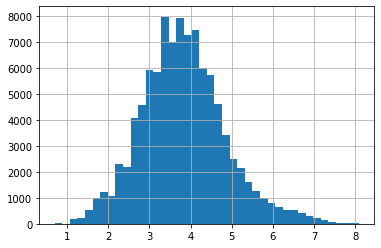

In [76]:
import numpy as np
np.log(f.len_lem_text + 1).hist(bins=40)

#### Сравниваем iqr по логарифму и в обычном виде

In [92]:
iqr = (f['len_lem_text'].quantile(0.75) - f['len_lem_text'].quantile(0.25)) * 1.5
f[(f.len_lem_text > f.len_lem_text.quantile(0.25) - iqr)&(f.len_lem_text < f.len_lem_text.quantile(0.75) + iqr)].shape

(89613, 16)

In [93]:
iqr_np = (np.log(f['len_lem_text']).quantile(0.75) - np.log(f['len_lem_text']).quantile(0.25)) * 1.5
f[(np.log(f.len_lem_text) > np.log(f.len_lem_text).quantile(0.25) - iqr_np) & \
  (np.log(f.len_lem_text) < np.log(f.len_lem_text.quantile(0.75)) + iqr_np)].shape

(96693, 16)

In [97]:
f = f[(np.log(f.len_lem_text) > np.log(f.len_lem_text).quantile(0.25) - iqr_np) & \
  (np.log(f.len_lem_text) < np.log(f.len_lem_text.quantile(0.75)) + iqr_np)]
f.shape

(96693, 16)

In [101]:
f.head()

,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg,text_reg_spell,text_reg_spell_stop,text_reg_spell_stop_lem,text_reg_spell_stop_stem,len_lem_text
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла,белуга опять вверх пошла,вверх пошла,вверх пойти,вверх пошл,11.0
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема,тоже интересная тема,интересная тема,интересный тема,интересн тем,15.0
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...,новые возможности единого счета от финама пом...,новые возможности единого счета финама помимо ...,новый возможность единый счёт финама помимо пр...,нов возможн един счет финам помим прям доступ ...,252.0
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью,что произошло с моей башнефтью,произошло башнефтью,произойти башнефть,произошл башнефт,18.0
6,20210313.0,"Да, Северсталь можно докупить, они с Автовазом...",25,"да, северсталь можно докупить, они с автовазом...",chmf,13,3,2021,5,2021-03-13 06:46:33+00:00,да северсталь можно докупить они с автовазом п...,да северсталь можно докупить они с автовазом п...,да северсталь докупить автовазом подписали кон...,да северсталь докупить автоваз подписать контр...,да северстал докуп автоваз подписа контракт ав...,109.0


In [103]:
f['total_msg'] = f.groupby(['ticker'])['ticker'].transform('count')
f.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,message,src,text,ticker,day,month,year,day_of_week,dt,text_reg,text_reg_spell,text_reg_spell_stop,text_reg_spell_stop_lem,text_reg_spell_stop_stem,len_lem_text,total_msg
0,20210316.0,Белуга опять вверх пошла,25,белуга опять вверх пошла,belu,16,3,2021,1,2021-03-16 13:31:32+00:00,белуга опять вверх пошла,белуга опять вверх пошла,вверх пошла,вверх пойти,вверх пошл,11.0,243
1,20210316.0,Тоже интересная тема !!!,25,тоже интересная тема !!!,irao,16,3,2021,1,2021-03-16 13:13:13+00:00,тоже интересная тема,тоже интересная тема,интересная тема,интересный тема,интересн тем,15.0,13632
2,20210316.0,"#brokers Новые возможности Единого счета от ""Ф...",25,"#brokers новые возможности единого счета от ""ф...",gche,16,3,2021,1,2021-03-16 09:09:52+00:00,новые возможности единого счета от финама пом...,новые возможности единого счета от финама пом...,новые возможности единого счета финама помимо ...,новый возможность единый счёт финама помимо пр...,нов возможн един счет финам помим прям доступ ...,252.0,511
3,20210315.0,Что произошло с моей Башнефтью ?,25,что произошло с моей башнефтью ?,bane,15,3,2021,0,2021-03-15 11:14:49+00:00,что произошло с моей башнефтью,что произошло с моей башнефтью,произошло башнефтью,произойти башнефть,произошл башнефт,18.0,357
6,20210313.0,"Да, Северсталь можно докупить, они с Автовазом...",25,"да, северсталь можно докупить, они с автовазом...",chmf,13,3,2021,5,2021-03-13 06:46:33+00:00,да северсталь можно докупить они с автовазом п...,да северсталь можно докупить они с автовазом п...,да северсталь докупить автовазом подписали кон...,да северсталь докупить автоваз подписать контр...,да северстал докуп автоваз подписа контракт ав...,109.0,561


In [106]:
print(len(f[f.total_msg > 200].ticker.unique()))
print(len(f[f.total_msg > 100].ticker.unique()))

60
62


In [111]:
f[f.total_msg < 200].ticker.unique()

array(['iskj', 'trmk'], dtype=object)

In [112]:
f.to_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg_spell_stop_lem_stem_len.csv', sep='|', index=False)